In [201]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

#
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Flatten, Dense


# Load prepared data

In [337]:
save_path = "/Users/chikakoolsen/opt/python/thesis/code/tdcs_thesis/data/processed/"

## fmap mean all experiments

In [188]:
file_mean = save_path+"fmap_mean.txt"
columns_mean =['exp', 'mini_exp', 'i', 'j', 'k', 'mean0', 'mean1', 'mean2', 'mean3', 'mean4', 'theory']
data = np.loadtxt(file_mean);

In [189]:
df = pd.DataFrame(data, columns=columns_mean)
df = df.astype({"exp": int, "i": int, "j": int, "k": int, "mini_exp": int})
df

,exp,mini_exp,i,j,k,mean0,mean1,mean2,mean3,mean4,theory
0,36,1,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,36,1,0,0,1,0.0,0.0,0.0,0.0,0.0,0.0
2,36,1,0,0,2,0.0,0.0,0.0,0.0,0.0,0.0
3,36,1,0,0,3,0.0,0.0,0.0,0.0,0.0,0.0
4,36,1,0,0,4,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
3244027,38,6,43,63,59,0.0,0.0,0.0,0.0,0.0,0.0
3244028,38,6,43,63,60,0.0,0.0,0.0,0.0,0.0,0.0
3244029,38,6,43,63,61,0.0,0.0,0.0,0.0,0.0,0.0
3244030,38,6,43,63,62,0.0,0.0,0.0,0.0,0.0,0.0


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3244032 entries, 0 to 3244031
Data columns (total 11 columns):
 #   Column    Dtype  
---  ------    -----  
 0   exp       int64  
 1   mini_exp  int64  
 2   i         int64  
 3   j         int64  
 4   k         int64  
 5   mean0     float64
 6   mean1     float64
 7   mean2     float64
 8   mean3     float64
 9   mean4     float64
 10  theory    float64
dtypes: float64(6), int64(5)
memory usage: 272.3 MB


# Split data

## Data 1. fmap mean all experiments

In [7]:
X = df.iloc[:, 5:-1].values 
y = df['theory'].values

X1_train, X1_test, y1_train, y1_test = train_test_split(
    X, y, test_size=0.3, random_state=0)

In [8]:
print(X.shape)
print(y.shape)
print(X1_train.shape)
print(y1_train.shape)
print(X1_test.shape)
print(y1_test.shape)

(3244032, 5)
(3244032,)
(2270822, 5)
(2270822,)
(973210, 5)
(973210,)


## Data2: One experiment

In [191]:
df_train = df[(df['exp']==36) & (df['mini_exp']!=6)]
df_test = df[(df['exp']==36) & (df['mini_exp']==6)]

In [192]:
df_train.iloc[:, 5:-1]

,mean0,mean1,mean2,mean3,mean4
0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...
901115,0.0,0.0,0.0,0.0,0.0
901116,0.0,0.0,0.0,0.0,0.0
901117,0.0,0.0,0.0,0.0,0.0
901118,0.0,0.0,0.0,0.0,0.0


In [193]:
X2_train = df_train.iloc[:, 5:-1].values
y2_train = df_train['theory'].values

X2_test = df_test.iloc[:, 5:-1].values
y2_test = df_test['theory'].values

In [194]:
print(X2_train.shape)
print(y2_train.shape)
print(X2_test.shape)
print(y2_test.shape)

(901120, 5)
(901120,)
(180224, 5)
(180224,)


## Data3: Normalize one experiment

In [117]:
scaler = MinMaxScaler()
# transform data
X3_train = scaler.fit_transform(X2_train)
X3_test = scaler.fit_transform(X2_test)

## Data4: Scale one experiment

In [118]:
scaler = StandardScaler()
# transform data
X4_train = scaler.fit_transform(X2_train)
X4_test = scaler.fit_transform(X2_test)

# Neural Network

## Data1: fmap means all experiments

In [89]:
X_train = X1_train
y_train = y1_train
X_test = X1_test
y_test = y1_test

In [90]:
model = keras.Sequential()
model.add(Dense(20, activation='relu', input_shape=[len(X_train[0])]))
model.add(Dense(1))
#
model.compile(optimizer= 'adam', loss='mse', metrics=['accuracy'])
history = model.fit(X_train, y_train, epochs=20, verbose=0, validation_data=[X_test, y_test])

In [91]:
train_pred = model.predict(X_train)
print(mse(train_pred, y_train))
test_pred = model.predict(X_test)
print(mse(test_pred, y_test))

70964/70964 [==============================] - 46s 654us/step
38.44056219993308
30413/30413 [==============================] - 19s 634us/step
46.3918535642208


In [92]:
model.evaluate(X_test, y_test)

30413/30413 [==============================] - 24s 774us/step - loss: 46.3918 - accuracy: 0.8084


[46.39183807373047, 0.8084133863449097]

In [93]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 20)                180       
                                                                 
 dense_7 (Dense)             (None, 1)                 21        
                                                                 
Total params: 201
Trainable params: 201
Non-trainable params: 0
_________________________________________________________________


In [94]:
history.history

{'loss': [66.74281311035156,
  42.7500114440918,
  40.544212341308594,
  39.693603515625,
  39.23619079589844,
  38.74108123779297,
  38.47666549682617,
  38.391075134277344,
  38.123497009277344,
  37.7577018737793,
  37.48772048950195,
  37.3863639831543,
  37.14435577392578,
  36.87738037109375,
  36.861473083496094,
  36.89885711669922,
  36.669403076171875,
  36.781253814697266,
  36.794219970703125,
  36.69332504272461],
 'accuracy': [0.6189203858375549,
  0.5055169463157654,
  0.5752212405204773,
  0.6163825392723083,
  0.6622412204742432,
  0.7119814157485962,
  0.7424448132514954,
  0.7422818541526794,
  0.7424782514572144,
  0.7477217316627502,
  0.7512345910072327,
  0.7460505366325378,
  0.7511980533599854,
  0.7564943432807922,
  0.7597380876541138,
  0.7520034313201904,
  0.7701431512832642,
  0.7735141515731812,
  0.7702431082725525,
  0.7729403972625732],
 'val_loss': [51.241249084472656,
  47.92045211791992,
  44.79644012451172,
  45.1495475769043,
  48.113365173339844

## Plot

### Loss function (MSE)

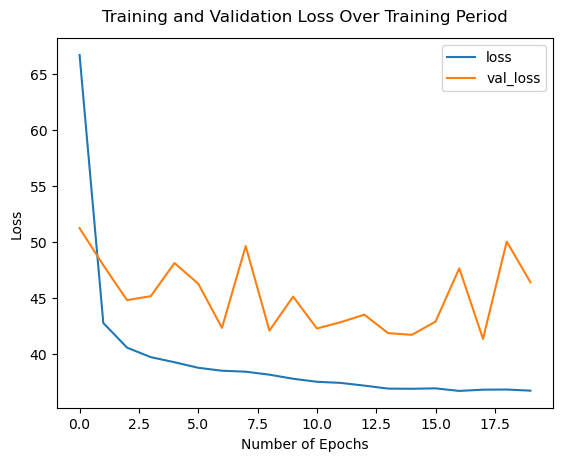

In [95]:
model_df = pd.DataFrame(history.history)
model_df[['loss', 'val_loss']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Training Period", pad=12);

### Accuracy

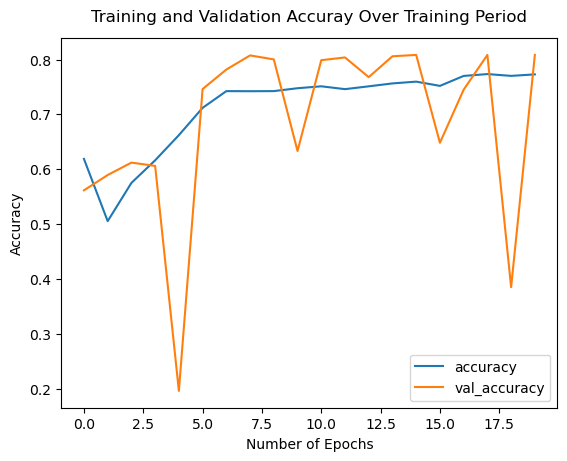

In [96]:
model_df[['accuracy', 'val_accuracy']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuray Over Training Period", pad=12);

### Theory vs Predict

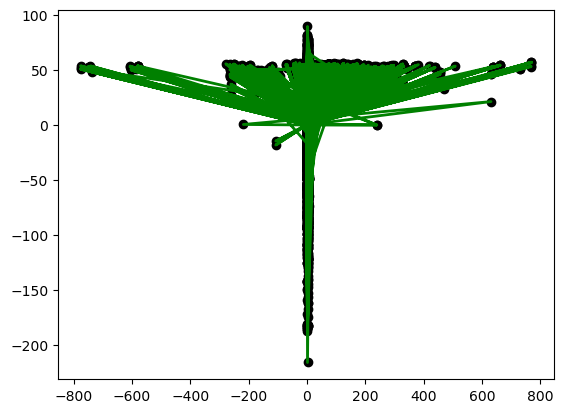

In [97]:
plt.scatter(y_test, test_pred,  color='black')
plt.plot(y_test, test_pred, color='green', linewidth=2)

In [ ]:
acc = (np.sum(y_test == test_pred).astype(np.float) / X_test.shape[0])

print('Test accuracy: %.2f%%' % (acc * 100))

## Data2: One experiment

In [195]:
X_train = X2_train
y_train = y2_train
X_test = X2_test
y_test = y2_test

In [196]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(901120, 5)
(901120,)
(180224, 5)
(180224,)


In [197]:
myCallbacks = [tf.keras.callbacks.EarlyStopping(monitor='val_accuracy', patience=10, mode='max'),
             tf.keras.callbacks.EarlyStopping(monitor='loss', patience=10, mode='min')]

In [360]:
model2 = keras.Sequential()

# model2.add(Dense(5, activation='relu', input_shape=(5,)))
# model2.add(Dense(3, activation='relu'))
# model2.add(Dense(1, activation="linear"))
# # Coef 0.7665, MSE 23.21, MAPE 0.9155, Accuracy 0.8112

# model2.add(Dense(20, activation='relu', input_shape=(5,)))
# model2.add(Dense(10, activation='relu'))
# model2.add(Dense(5, activation='relu'))
# model2.add(Dense(1, activation="linear"))
# # Coef 0.7815, MSE 22.56, MAPE 0.9038, Accuracy 0.8112 

model2.add(Dense(10, activation='relu', input_shape=(5,)))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(10, activation='relu'))
model2.add(Dense(1, activation="linear"))
# # Coef 0.7894, MSE 21.13, MAPE 0.8703, Accuracy 0.8112 => Best

# model2.add(Dense(10, activation='relu', input_shape=(5,)))
# model2.add(Dense(10, activation='relu'))
# model2.add(Dense(1, activation="linear"))
# # Coef 0.7786, MSE 22.19, MAPE 0.8877, Accuracy 0.8112

# model2.add(Dense(20, activation='relu', input_shape=[len(X_train[0])]))
# model2.add(Dense(1))
# # Coef 0.71174903, MSE 28.1933, MAPE 0.9055, Accuracy 0.8114


### BAD ###
# model2.add(Dense(100, activation='relu', input_shape=(5,)))
# model2.add(Dense(50, activation='relu'))
# model2.add(Dense(10, activation='relu'))
# model2.add(Dense(1, activation="linear"))
# # Coef 0.5541, MSE 38.85, MAPE 1.134, Accuracy 0.8112 => Worse

# model2.add(Dense(10, activation='relu', input_shape=(5,)))
# model2.add(Dense(5, activation='relu'))
# model2.add(Dense(3, activation='relu'))
# model2.add(Dense(1, activation="linear"))
# # Coef None, MSE 56.06, MAPE 1.656, Accuracy 5.5487e-06 => Worse

# model2.add(Dense(10, activation='relu', input_shape=(5,)))
# model2.add(Dense(5, activation='relu'))
# model2.add(Dense(1, activation="linear"))
# # Coef 0.7285, MSE 26.74, MAPE 1.5369, Accuracy 0.8114 => Bad

# model2.add(Dense(5, activation='relu', input_shape=[len(X_train[0])]))
# model2.add(Dense(5, activation='relu'))
# model2.add(Dense(5, activation='relu'))
# model2.add(Dense(1))
# # Coef 0.7833, MSE 21.68 MAPE 1.197, Accuracy 0.8112 

model2.compile(optimizer='adam', loss='mse', metrics=['accuracy'])
history2 = model2.fit(X_train, y_train, epochs=100, validation_data=[X_test, y_test], callbacks=myCallbacks)


Epoch 1/100
28160/28160 [==============================] - 51s 2ms/step - loss: 70.5361 - accuracy: 0.8095 - val_loss: 31.3450 - val_accuracy: 0.8114
Epoch 2/100
28160/28160 [==============================] - 51s 2ms/step - loss: 23.0232 - accuracy: 0.8013 - val_loss: 23.0297 - val_accuracy: 0.8114
Epoch 3/100
28160/28160 [==============================] - 46s 2ms/step - loss: 22.0591 - accuracy: 0.7953 - val_loss: 23.3191 - val_accuracy: 0.8114
Epoch 4/100
28160/28160 [==============================] - 35s 1ms/step - loss: 21.4852 - accuracy: 0.7957 - val_loss: 22.2557 - val_accuracy: 0.8112
Epoch 5/100
28160/28160 [==============================] - 40s 1ms/step - loss: 21.0236 - accuracy: 0.7943 - val_loss: 22.6856 - val_accuracy: 0.8112
Epoch 6/100
28160/28160 [==============================] - 50s 2ms/step - loss: 21.4583 - accuracy: 0.7915 - val_loss: 22.6444 - val_accuracy: 0.8112
Epoch 7/100
28160/28160 [==============================] - 48s 2ms/step - loss: 20.7475 - accuracy: 

In [361]:
train_pred2 = model2.predict(X_train)
print(mse(train_pred2, y_train))
print(mape(train_pred2, y_train))
test_pred2 = model2.predict(X_test)
print(mse(test_pred2, y_test))
print(mape(test_pred2, y_test))

28160/28160 [==============================] - 32s 1ms/step
19.248337125661262
0.8618103446477442
5632/5632 [==============================] - 6s 1ms/step
21.34807367403678
0.8678434210839641


In [362]:
np.corrcoef(test_pred2.flatten(),y_test)

array([[1.        , 0.78694668],
       [0.78694668, 1.        ]])

In [363]:
model2.evaluate(X_test, y_test)

5632/5632 [==============================] - 5s 881us/step - loss: 21.3478 - accuracy: 0.8112


[21.347797393798828, 0.8112127184867859]

In [364]:
model2.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_127 (Dense)           (None, 10)                60        
                                                                 
 dense_128 (Dense)           (None, 10)                110       
                                                                 
 dense_129 (Dense)           (None, 10)                110       
                                                                 
 dense_130 (Dense)           (None, 1)                 11        
                                                                 
Total params: 291
Trainable params: 291
Non-trainable params: 0
_________________________________________________________________


In [365]:
history2.history

{'loss': [70.53611755371094,
  23.023168563842773,
  22.059120178222656,
  21.485179901123047,
  21.023574829101562,
  21.458295822143555,
  20.747465133666992,
  20.87920379638672,
  20.674291610717773,
  20.560890197753906,
  20.375850677490234],
 'accuracy': [0.8095003962516785,
  0.8013139367103577,
  0.7952991724014282,
  0.7956908941268921,
  0.7943170666694641,
  0.7915316224098206,
  0.8020529747009277,
  0.7983931303024292,
  0.7977461218833923,
  0.8100963234901428,
  0.8075761198997498],
 'val_loss': [31.34503936767578,
  23.02967071533203,
  23.319063186645508,
  22.255678176879883,
  22.685558319091797,
  22.644386291503906,
  22.474851608276367,
  22.245553970336914,
  23.826812744140625,
  23.19800567626953,
  21.347797393798828],
 'val_accuracy': [0.8113847374916077,
  0.8113847374916077,
  0.8113791942596436,
  0.8112071752548218,
  0.8112071752548218,
  0.8112127184867859,
  0.8112071752548218,
  0.8112127184867859,
  0.8112071752548218,
  0.8112127184867859,
  0.8112

## Plot

### Loss function (MSE)

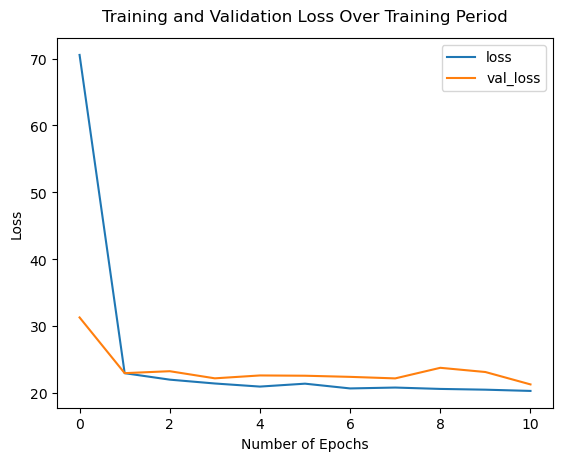

In [391]:
model_df = pd.DataFrame(history2.history)
model_df[['loss', 'val_loss']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Training Period", pad=12);

### Accuracy

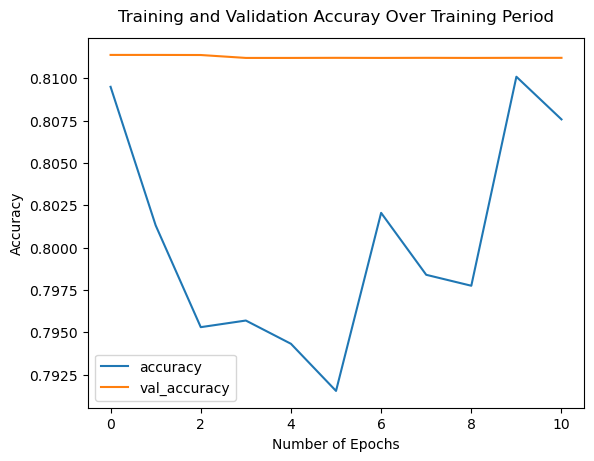

In [392]:
model_df[['accuracy', 'val_accuracy']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuray Over Training Period", pad=12);

### Theory vs Predict

r: 0.78695%, st_er: 0.001142%
y = 0.6185*x + 0.7269


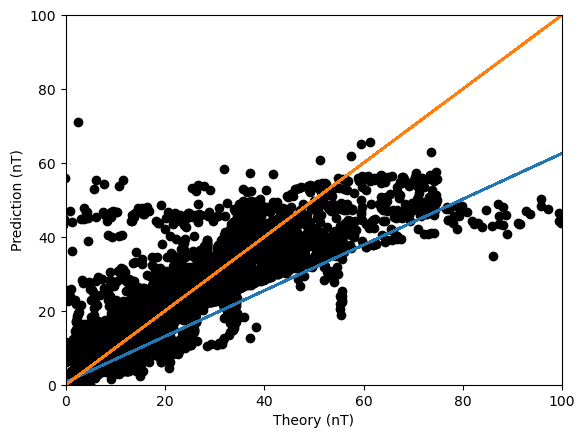

In [393]:
x = y_test.flatten()
y = test_pred2.flatten()
m, b, r, p, st_er = stats.linregress(x,y) 

yfit = [b + m * xi for xi in x]
yisx = [0 + 1 * xi for xi in x]
plt.plot(x, yfit)
plt.plot(x, yisx)

plt.scatter(y_test, test_pred2,  color='black')
plt.axis([0,100, 0, 100])
plt.xlabel("Theory (nT)")
plt.ylabel("Prediction (nT)")
# print(r, st_er)
print("r: {:.5f}%, st_er: {:.6f}%".format(r, st_er))
print("y = "+str(round(m,4))+"*x + "+str(round(b,4)))

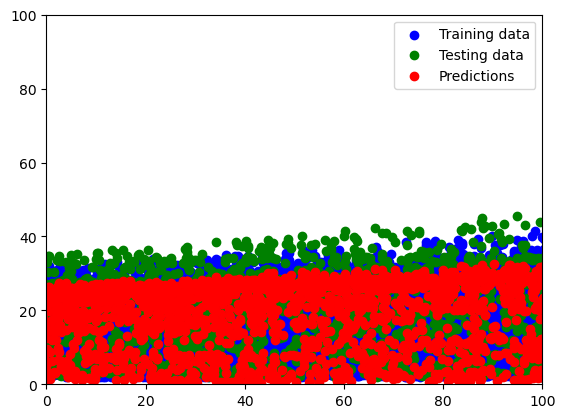

In [387]:
plt.scatter(df_train.iloc[:, 5:6].values, y_train, c="b", label="Training data")
plt.scatter(df_test.iloc[:, 5:6].values, y_test, c="g", label="Testing data")
plt.scatter(df_test.iloc[:, 5:6].values, test_pred2, c="r", label="Predictions")
plt.axis([0,100, 0, 100])
plt.legend()

# Output data

In [369]:
df_test['predict'] = test_pred2

/var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/ipykernel_82638/3293406254.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predict'] = test_pred2


In [370]:
np.savetxt(save_path+"nn.txt", df_test[['i', 'j', 'k', 'predict']], fmt="%i %i %i %s")

# MLPRegressor

In [240]:
from sklearn.neural_network import MLPRegressor

regr = MLPRegressor(random_state=1, hidden_layer_sizes = (10,10,10), max_iter=500).fit(X_train, y_train)

In [241]:
regr.score(X_test, y_test)

0.630780953764696

In [242]:
y_predict = regr.predict(X_test)

In [243]:
np.corrcoef(y_predict,y_test)

array([[1.        , 0.79448347],
       [0.79448347, 1.        ]])

## Data3: 55 fmap means

In [33]:
X_train = X3_train
y_train = y3_train
X_test = X3_test
y_test = y3_test

In [34]:
model3 = keras.Sequential()
model3.add(Dense(20, activation='relu', input_shape=[len(X_train[0])]))
model3.add(Dense(1))
#
model3.compile(optimizer= 'adam', loss='mse', metrics=['accuracy'])
history3 = model3.fit(X_train, y_train, epochs=20, verbose=0, validation_data=[X_test, y_test])


In [35]:
train_pred3 = model3.predict(X_train)
print(mse(train_pred3, y_train))
test_pred3 = model3.predict(X_test)
print(mse(test_pred3, y_test))

70964/70964 [==============================] - 45s 632us/step
68.77916304603048
30413/30413 [==============================] - 19s 627us/step
72.2654945878932


In [36]:
model3.evaluate(X_test, y_test)

30413/30413 [==============================] - 23s 741us/step - loss: 72.2655 - accuracy: 6.0624e-05


[72.2655258178711, 6.062411921448074e-05]

In [37]:
model3.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 20)                1180      
                                                                 
 dense_3 (Dense)             (None, 1)                 21        
                                                                 
Total params: 1,201
Trainable params: 1,201
Non-trainable params: 0
_________________________________________________________________


In [38]:
history3.history

{'loss': [424.44866943359375,
  52.18746566772461,
  51.95429611206055,
  52.74146270751953,
  52.98725891113281,
  53.29958724975586,
  53.16404724121094,
  52.7490234375,
  50.758277893066406,
  52.65450668334961,
  51.552188873291016,
  52.617671966552734,
  53.788509368896484,
  51.86954116821289,
  54.698970794677734,
  53.814910888671875,
  54.32284927368164,
  53.93813705444336,
  60.74116897583008,
  58.160919189453125],
 'accuracy': [0.19938991963863373,
  0.05913321301341057,
  0.0845579281449318,
  0.22490622103214264,
  0.0676451101899147,
  0.1753215342760086,
  0.06831182539463043,
  0.14271968603134155,
  0.07882960140705109,
  0.05445164814591408,
  0.03953986614942551,
  0.05900947004556656,
  0.06043890863656998,
  0.04243529587984085,
  0.07458136230707169,
  0.0736151933670044,
  0.054844897240400314,
  0.07133672386407852,
  0.0954161062836647,
  0.09563849866390228],
 'val_loss': [55.899784088134766,
  88.07706451416016,
  51.993961334228516,
  53.2925910949707,
 

## Plot

### Loss function (MSE)

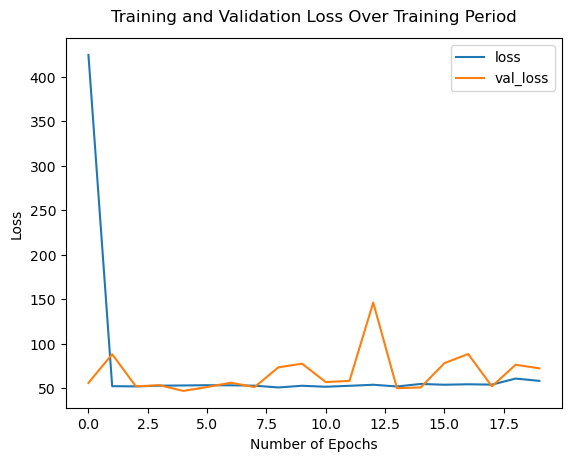

In [39]:
model_df = pd.DataFrame(history3.history)
model_df[['loss', 'val_loss']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Training Period", pad=12);

### Accuracy

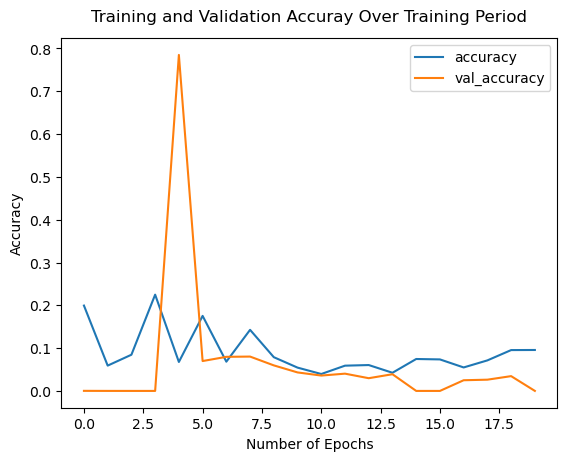

In [40]:
model_df[['accuracy', 'val_accuracy']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuray Over Training Period", pad=12);

### Theory vs Predict

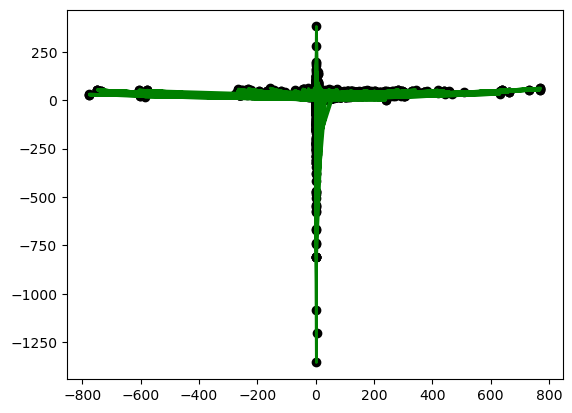

In [41]:
plt.scatter(y_test, test_pred3,  color='black')
plt.plot(y_test, test_pred3, color='green', linewidth=2)

## Data4: +ON and -ON

In [85]:
X_train = X4_train
y_train = y4_train
X_test = X4_test
y_test = y4_test

In [43]:
model4 = keras.Sequential()
model4.add(Dense(20, activation='relu', input_shape=[len(X_train[0])]))
model4.add(Dense(1))
#
model4.compile(optimizer= 'adam', loss='mse', metrics=['accuracy'])
history4 = model4.fit(X_train, y_train, epochs=20, verbose=0, validation_data=[X_test, y_test])


In [44]:
train_pred4 = model4.predict(X_train)
print(mse(train_pred4, y_train))
test_pred4 = model4.predict(X_test)
print(mse(test_pred4, y_test))

141927/141927 [==============================] - 88s 619us/step
39.73835734703439
60826/60826 [==============================] - 38s 632us/step
41.96294873748612


In [45]:
model4.evaluate(X_test, y_test)

60826/60826 [==============================] - 45s 741us/step - loss: 41.9632 - accuracy: 0.6654


[41.96320343017578, 0.6654226779937744]

In [46]:
model4.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 20)                140       
                                                                 
 dense_5 (Dense)             (None, 1)                 21        
                                                                 
Total params: 161
Trainable params: 161
Non-trainable params: 0
_________________________________________________________________


In [47]:
history4.history

{'loss': [51.56545639038086,
  44.62747573852539,
  43.859405517578125,
  43.12508010864258,
  42.8978271484375,
  42.78590393066406,
  42.58470916748047,
  42.47372817993164,
  42.43391799926758,
  42.53626251220703,
  42.26179885864258,
  42.27949523925781,
  41.985958099365234,
  42.02499771118164,
  42.05527877807617,
  42.050254821777344,
  42.0495719909668,
  41.9505500793457,
  41.859764099121094,
  41.87369918823242],
 'accuracy': [0.6554800271987915,
  0.6125836968421936,
  0.6082808375358582,
  0.6149914264678955,
  0.6232080459594727,
  0.626397430896759,
  0.6293062567710876,
  0.6297336220741272,
  0.6336044669151306,
  0.6324621438980103,
  0.6334171295166016,
  0.634300708770752,
  0.6374412178993225,
  0.6382600665092468,
  0.638846218585968,
  0.6393043994903564,
  0.6390018463134766,
  0.6395168900489807,
  0.6402833461761475,
  0.6400572061538696],
 'val_loss': [45.802162170410156,
  51.937313079833984,
  43.757896423339844,
  43.60121154785156,
  41.72332763671875,


## Plot

### Loss function (MSE)

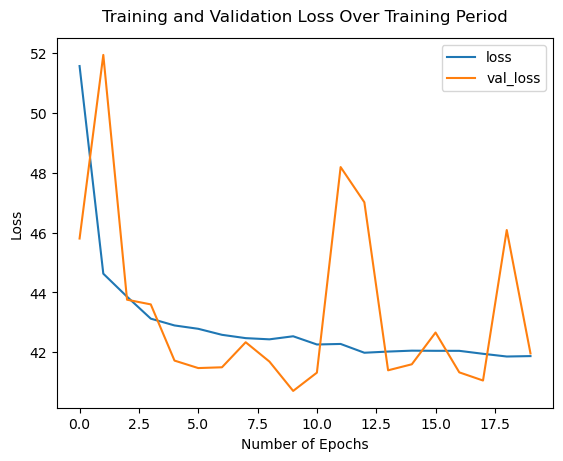

In [48]:
model_df = pd.DataFrame(history4.history)
model_df[['loss', 'val_loss']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.title("Training and Validation Loss Over Training Period", pad=12);

### Accuracy

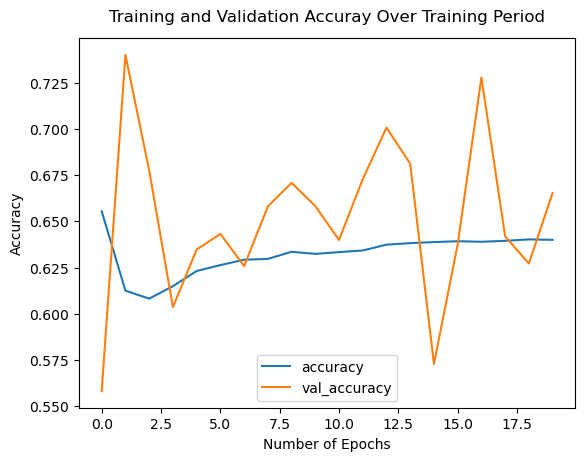

In [49]:
model_df[['accuracy', 'val_accuracy']].plot()
plt.xlabel("Number of Epochs")
plt.ylabel("Accuracy")
plt.title("Training and Validation Accuray Over Training Period", pad=12);

### Theory vs Predict

(0.0, 100.0, 0.0, 100.0)

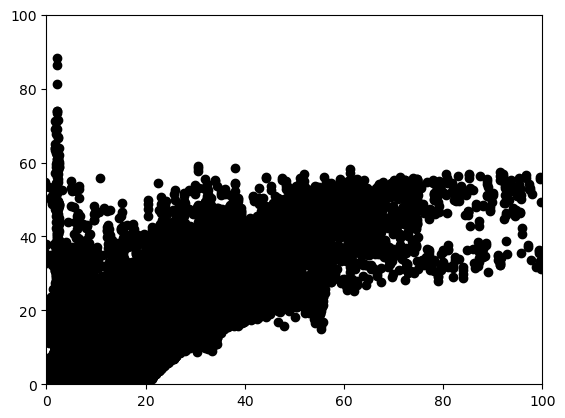

In [87]:
plt.scatter(y_test, test_pred4,  color='black')
plt.axis([0,100, 0, 100])

# Output image data

In [115]:
df['predict'] = test_pred
df_test['predict'] = test_pred2
df_55['predict'] = test_pred3
df_on['predict'] = test_pred4

/var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/ipykernel_3032/2079570890.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predict'] = test_pred
/var/folders/yd/vkjb_lqj2_30lnyhzhjqtg9w0000gp/T/ipykernel_3032/2079570890.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_test['predict2'] = test_pred2


In [116]:
np.savetxt(save_path+"nn.txt", df[['i', 'j', 'k', 'predict']], fmt="%i %i %i %s")

In [117]:
np.savetxt(save_path+"nn2.txt", df_test[['i', 'j', 'k', 'predict']], fmt="%i %i %i %s")

In [ ]:
np.savetxt(save_path+"nn3.txt", df_55[['i', 'j', 'k', 'predict']], fmt="%i %i %i %s")

In [ ]:
np.savetxt(save_path+"nn4.txt", df_on[['i', 'j', 'k', 'predict']], fmt="%i %i %i %s")